In [1]:
# calculate galactic flux in LuSEE-N band 
# according to Zaslavsky and Eastwood STEREO papers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from lusee.mono_sky_models import B_NB, B_C, T2B, B2T, B2V, T_DarkAges

In [2]:
# get max flux density and frequency for the 2 models
f=np.linspace(1,100,1000)
BNB=B_NB(f)
fmax_BNB=f[np.argmax(BNB)]
BC=B_C(f)
fmax_C=f[np.argmax(BC)]
print(BNB.max(), BC.max())
print(fmax_BNB, fmax_C)

1.2411900978506889e-20 1.3709826004867284e-20
4.864864864864865 3.081081081081081


In [3]:
# get flux density at edges of band
print(B_NB(1), B_NB(50))
print(B_C(1), B_C(50))

5.117442925775966e-21 5.318926693175571e-21
4.998002021074842e-21 3.7040678463336234e-21


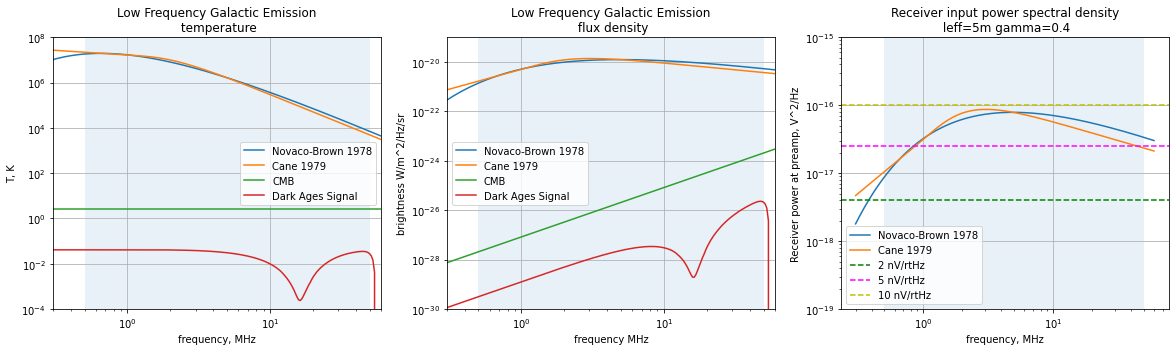

In [4]:
plt.figure(figsize=(20,5))

# first subplot: galactic background spectra (Kelvin) for 2 models
plt.subplot(1,3,1)
f = np.logspace(np.log10(0.3),np.log10(60),200)
plt.plot(f,B2T(B_NB(f),f), label='Novaco-Brown 1978')
plt.plot(f,B2T(B_C(f),f), label='Cane 1979')
DeltaT=0.041
Tcmb = np.ones_like(f)*2.73-DeltaT
plt.plot(f,Tcmb,label='CMB')
plt.plot(f,T_DarkAges(f)+DeltaT,label='Dark Ages Signal')
rect = mpatches.Rectangle((0.5,1e-4),50, 500e6, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.xlim(f[0],f[-1])
plt.ylim(1e-4,1e8)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('frequency, MHz')
plt.ylabel('T, K')
_=plt.title("Low Frequency Galactic Emission\n temperature")

# second subplot: spectra (W/m^2/Hz/sr)
plt.subplot(1,3,2)
plt.loglog(f, B_NB(f), label='Novaco-Brown 1978')
plt.loglog(f, B_C(f), label='Cane 1979')
plt.plot(f,T2B(Tcmb,f),label='CMB')
plt.plot(f,T2B(T_DarkAges(f)+DeltaT,f),label='Dark Ages Signal')
plt.xlim(f[0],f[-1])
rect = mpatches.Rectangle((.5,1e-30),50, 1e-19, fill='g', alpha=.1)
plt.ylim(1e-30,1e-19)
plt.gca().add_patch(rect)
plt.grid()
plt.legend()
plt.xlabel('frequency MHz')
plt.title("Low Frequency Galactic Emission\n flux density")
_=plt.ylabel('brightness W/m^2/Hz/sr')

# third subplot: spectrum of receiver power (V^2/Hz) assuming a dipole antenna with 
# leff effective length (m) coupling to high-impedance receiver with 40% efficiency (ala PSP RFS)
# superimposed lines of receiver noise spectral density for 2, 5, 10 nV/rtHz
plt.subplot(1,3,3)
plt.plot(f, B2V(B_NB(f), f, 5, .4), label='Novaco-Brown 1978')
plt.plot(f, B2V(B_C(f), f, 5, .4), label='Cane 1979')
#plt.plot(f,B2V(T2B(Tcmb,f),f,5,.4),label='CMB')
#plt.plot(f,B2V(T2B(lusee.monosky.T_DarkAges(f)+DeltaT,f),f,5,.4),label='Dark Ages Signal')
rect = mpatches.Rectangle((.5,1e-20),50, 1e-15, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-19,1e-15)
plt.grid()
plt.xlabel('frequency, MHz')
plt.ylabel('Receiver power at preamp, V^2/Hz')
plt.axhline((2*1e-9)**2, c='g', ls='dashed', label='2 nV/rtHz')
plt.axhline((5*1e-9)**2, c='magenta', ls='dashed', label='5 nV/rtHz')
plt.axhline((10*1e-9)**2, c='y', ls='dashed', label='10 nV/rtHz')
plt.title('Receiver input power spectral density\n leff=5m gamma=0.4')
_=plt.legend()
plt.savefig('zasfig.png',dpi=300)

In [5]:
def time_at_20(noise_level):
    Tsky = 0.5*(B2T(B_C(20),20) + B2T(B_NB(20),20))
    Tnoise = Tsky*noise_level
    timeCMB = ((Tnoise+Tsky)/2.73)**2/1e6
    minsCMB = timeCMB/(60)
    timeDA = ((Tnoise+Tsky)/0.04)**2/1e6
    cyclesDA = timeDA/(24*3600)/14
    print (minsCMB,cyclesDA)
    
time_at_20(0.0)
time_at_20(0.5)
time_at_20(1.0)
time_at_20(2.0)
time_at_20(10.0)

8.077112555064181 K2 1.866254717312681 K2
18.17350324889441 K2 4.199073113953532 K2
32.308450220256724 K2 7.465018869250724 K2
72.69401299557764 K2 16.79629245581413 K2
977.3306191627661 K2 225.8168207948344 K2


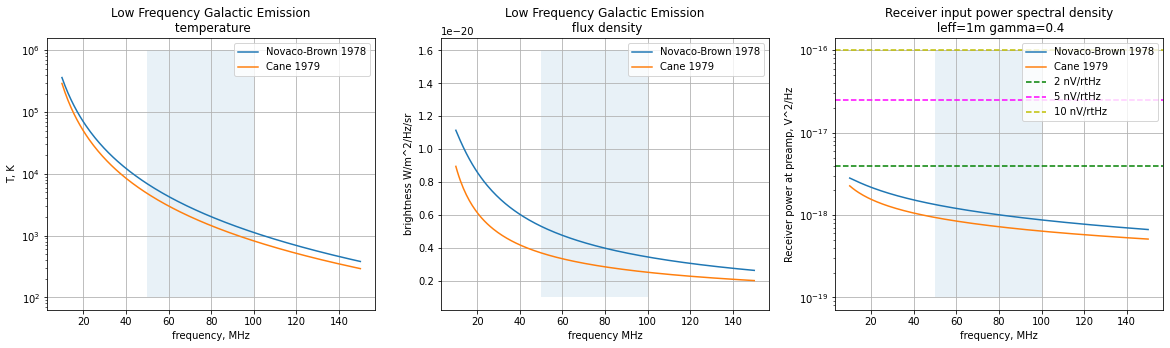

In [6]:
# repeat for 50-100MHz observing with short dipole leff=1m
plt.figure(figsize=(20,5))

# first subplot: galactic background spectra (Kelvin) for 2 models
plt.subplot(1,3,1)
f = np.linspace(10,150,200)
plt.plot(f,B2T(B_NB(f),f), label='Novaco-Brown 1978')
plt.plot(f,B2T(B_C(f),f), label='Cane 1979')
rect = mpatches.Rectangle((50,100),50, 1e6, fill='g', alpha=.1)
plt.gca().add_patch(rect)
# plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('frequency, MHz')
plt.ylabel('T, K')
_=plt.title("Low Frequency Galactic Emission\n temperature")

# second subplot: spectra (W/m^2/Hz/sr)
plt.subplot(1,3,2)
plt.plot(f, B_NB(f), label='Novaco-Brown 1978')
plt.plot(f, B_C(f), label='Cane 1979')
rect = mpatches.Rectangle((50,1e-21),50, .15e-19, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.grid()
plt.legend()
plt.xlabel('frequency MHz')
plt.title("Low Frequency Galactic Emission\n flux density")
_=plt.ylabel('brightness W/m^2/Hz/sr')

# third subplot: spectrum of receiver power (V^2/Hz) assuming a dipole antenna with 
# leff effective length (m) coupling to high-impedance receiver with 40% efficiency (ala PSP RFS)
# superimposed lines of receiver noise spectral density for 2, 5, 10 nV/rtHz
plt.subplot(1,3,3)
plt.plot(f, B2V(B_NB(f), f, 1, .4), label='Novaco-Brown 1978')
plt.plot(f, B2V(B_C(f), f, 1, .4), label='Cane 1979')
rect = mpatches.Rectangle((50,1e-19),50, 1e-16, fill='g', alpha=.1)
plt.gca().add_patch(rect)
# plt.xscale('log')
plt.yscale('log')
# plt.ylim(1e-19,1e-15)
plt.grid()
plt.xlabel('frequency, MHz')
plt.ylabel('Receiver power at preamp, V^2/Hz')
plt.axhline((2*1e-9)**2, c='g', ls='dashed', label='2 nV/rtHz')
plt.axhline((5*1e-9)**2, c='magenta', ls='dashed', label='5 nV/rtHz')
plt.axhline((10*1e-9)**2, c='y', ls='dashed', label='10 nV/rtHz')
plt.title('Receiver input power spectral density\n leff=1m gamma=0.4')
_=plt.legend(loc='upper right')

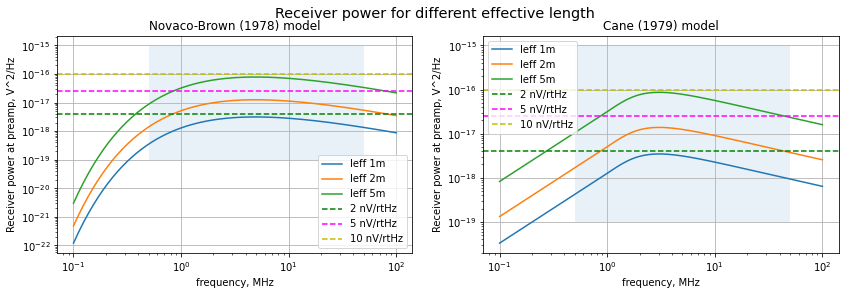

In [7]:
# show effect of changing effective length
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
f = np.logspace(-1,2,200)
for leff in [1,2,5]:
    plt.plot(f, B2V(B_NB(f), f, leff, .4), label='leff ' + str(leff)+ 'm')
rect = mpatches.Rectangle((.5,1e-19),50, 1e-15, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('frequency, MHz')
plt.ylabel('Receiver power at preamp, V^2/Hz')
plt.axhline((2*1e-9)**2, c='g', ls='dashed', label='2 nV/rtHz')
plt.axhline((5*1e-9)**2, c='magenta', ls='dashed', label='5 nV/rtHz')
plt.axhline((10*1e-9)**2, c='y', ls='dashed', label='10 nV/rtHz')
plt.legend()
plt.title('Novaco-Brown (1978) model')

plt.subplot(1,2,2)
f = np.logspace(-1,2,200)
for leff in [1,2,5]:
    plt.plot(f, B2V(B_C(f), f, leff, .4), label='leff ' + str(leff)+ 'm')
rect = mpatches.Rectangle((.5,1e-19),50, 1e-15, fill='g', alpha=.1)
plt.gca().add_patch(rect)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('frequency, MHz')
plt.ylabel('Receiver power at preamp, V^2/Hz')
plt.axhline((2*1e-9)**2, c='g', ls='dashed', label='2 nV/rtHz')
plt.axhline((5*1e-9)**2, c='magenta', ls='dashed', label='5 nV/rtHz')
plt.axhline((10*1e-9)**2, c='y', ls='dashed', label='10 nV/rtHz')
plt.legend()
_=plt.title('Cane (1979) model')
_=plt.suptitle('Receiver power for different effective length', fontsize='x-large')

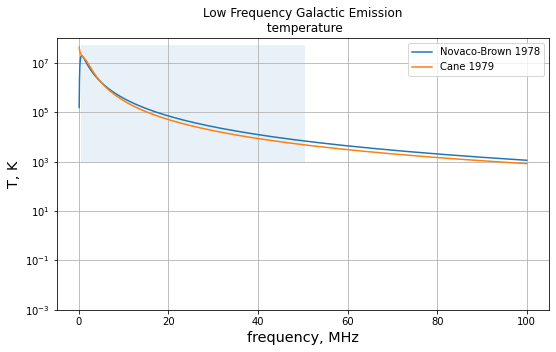

In [8]:
plt.figure(figsize=(30,5))

# first subplot: galactic background spectra (Kelvin) for 2 models
plt.subplot(1,3,1)
f = np.logspace(-1,2,200)
plt.plot(f,B2T(B_NB(f),f), label='Novaco-Brown 1978')
plt.plot(f,B2T(B_C(f),f), label='Cane 1979')
rect = mpatches.Rectangle((.5,1000),50, 50e6, fill='g', alpha=.1)
plt.gca().add_patch(rect)
# plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,1e8)
plt.grid()
plt.legend()
plt.xlabel('frequency, MHz', fontsize='x-large')
plt.ylabel('T, K', fontsize='x-large')

_=plt.title("Low Frequency Galactic Emission\n temperature")
plt.savefig('LF_Galactic_linear.png')